In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random as rd

In [2]:
# Parameters
T0 = 1000  # Initial temperature
T_min = 0.01  # Minimum temperature to stop annealing
tau = 0.99  # Temperature decay parameter
beta = 0.0001  # Probability parameter

# Get city coordinates from the user
N = int(input("Enter the number of cities: "))
cities = []

Enter the number of cities:  21


In [5]:
# Generate random city coordinates
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
cities = np.column_stack((x, y))

# Cost function to calculate the total distance of a given path
def cost_function(path, cities):
    dist = 0
    for i in range(len(path)):
        dist += np.linalg.norm(cities[path[i]] - cities[path[(i + 1) % len(path)]])
    return dist

In [7]:
# Simulated Annealing Algorithm
def simulated_annealing(cities, T0, T_min, tau, beta):
    current_path = np.arange(N)  # Initial path
    np.random.shuffle(current_path)
    current_distance = cost_function(current_path, cities)
    best_path = current_path.copy()
    best_distance = current_distance
    T = T0

    distances = [current_distance]  # Track the distance over iterations
    all_paths = [current_path.copy()]  # Store all explored paths
    while T > T_min:
        # Create a new path by swapping two cities
        new_path = current_path.copy()
        i, j = np.random.randint(0, N, 2)
        new_path[i], new_path[j] = new_path[j], new_path[i]
        new_distance = cost_function(new_path, cities)
        
        # Accept new path with probability based on current temperature
        if new_distance < current_distance or np.exp((current_distance - new_distance) / (beta * T)) > np.random.rand():
            current_path, current_distance = new_path, new_distance
            if current_distance < best_distance:
                best_path, best_distance = current_path, current_distance
        
        all_paths.append(current_path.copy())
        # Update temperature and track distance
        T *= (1 - 1 / tau)
        distances.append(current_distance)
    
    return best_path, best_distance, distances,all_paths

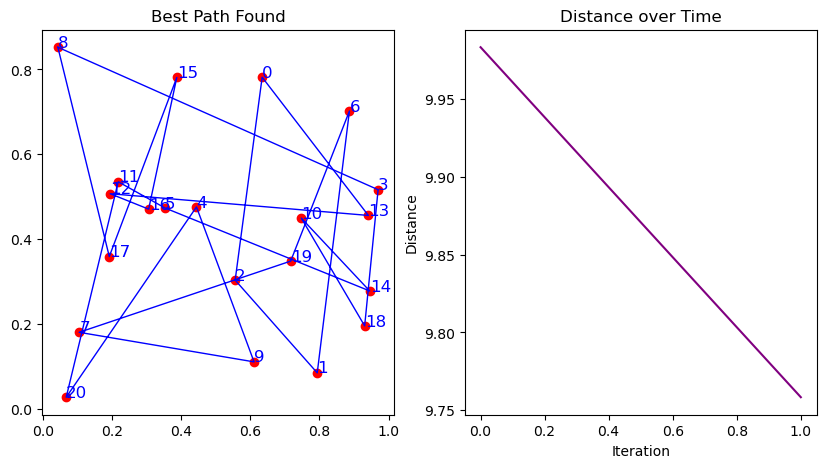

All paths: [array([ 3, 18, 10, 14,  5, 11, 20,  4, 17,  7, 19,  6,  1,  2,  0, 13, 12,
       16, 15,  9,  8]), array([ 3, 18, 10, 14,  5, 11, 20,  4,  9,  7, 19,  6,  1,  2,  0, 13, 12,
       16, 15, 17,  8])]
Best path: [ 3 18 10 14  5 11 20  4  9  7 19  6  1  2  0 13 12 16 15 17  8]
Best distance: 9.758379523743349


In [9]:
# Run simulated annealing
best_path, best_distance, distances,all_paths = simulated_annealing(cities, T0, T_min, tau, beta)

# Plot the cities and the path
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(cities[:, 0], cities[:, 1], color='red')
for i in range(N):
    plt.text(cities[i, 0], cities[i, 1], str(i), color="blue", fontsize=12)
plt.plot(cities[best_path, 0], cities[best_path, 1], 'b-', lw=1)
plt.plot([cities[best_path[-1], 0], cities[best_path[0], 0]], [cities[best_path[-1], 1], cities[best_path[0], 1]], 'b-', lw=1)
plt.title("Best Path Found")

# Plot the distance over iterations
plt.subplot(1, 2, 2)
plt.plot(distances, color="purple")
plt.xlabel("Iteration")
plt.ylabel("Distance")
plt.title("Distance over Time")
plt.show()

print(f"All paths: {all_paths}")
print(f"Best path: {best_path}")
print(f"Best distance: {best_distance}")